<a href="https://colab.research.google.com/github/isismeira/classificacao_roupas_redes_neurais/blob/main/classificacao_com_redes_neurais_feedfoward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de peças de roupas com redes neurais *feedfoward*

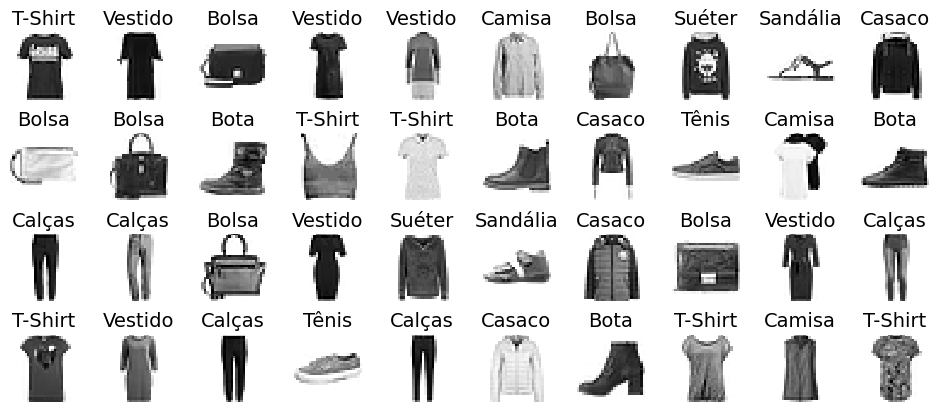

## Importação das bibliotecas

In [81]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Conhecendo o dataset Fashion MNIST

In [82]:
fashion = keras.datasets.fashion_mnist
(X_treino_completo, Y_treino_completo), (X_teste, Y_teste) = fashion.load_data()

In [83]:
X_treino_completo.shape

(60000, 28, 28)

In [84]:
X_treino_completo.dtype

dtype('uint8')

In [85]:
# Aleatoriza e divide mantendo a distribuição das classes
X_treino, X_validacao, Y_treino, Y_validacao = train_test_split(
    X_treino_completo,
    Y_treino_completo,
    test_size=5000,  # ou 0.1 para 10%
    random_state=42,
    stratify=Y_treino_completo  # mantém proporção de classes
)

# Normalização APÓS a divisão
X_treino = X_treino / 255.0
X_validacao = X_validacao / 255.0
X_teste = X_teste / 255.0

In [86]:
classes = ["T-Shirt", "Calças", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

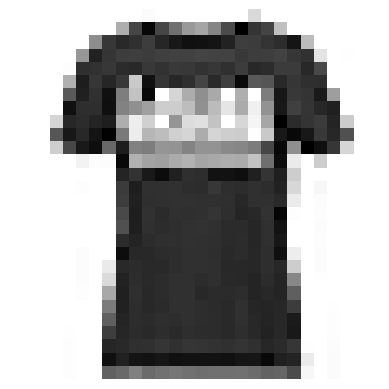

In [87]:
plt.imshow(X_treino[0], cmap="binary")
plt.axis('off')
plt.show()

In [88]:
classes[Y_treino[0]]

'T-Shirt'

## Criando o modelo com a Sequential API

In [89]:
modelo = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

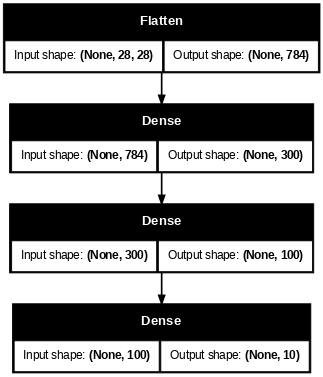

In [91]:
tf.keras.utils.plot_model(modelo, "arquitetura_do_modelo.png", show_shapes=True, dpi=60)

In [92]:
modelo.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [93]:
oculta_1 = modelo.layers[1]

In [94]:
pesos, vieses = oculta_1.get_weights()

In [95]:
pesos

array([[ 0.05509908, -0.00718958, -0.05691091, ...,  0.05667271,
         0.02558178, -0.00912812],
       [ 0.01121263, -0.00714499, -0.02401223, ..., -0.06258027,
        -0.05147259,  0.06573543],
       [ 0.00104555,  0.01605749,  0.00610869, ...,  0.05261062,
         0.02102187,  0.03855491],
       ...,
       [-0.06123811,  0.00607686, -0.0651528 , ...,  0.00961244,
         0.03930574, -0.07376194],
       [ 0.05591752, -0.01596976,  0.04212957, ...,  0.01651352,
         0.00130873, -0.0326992 ],
       [ 0.03905659, -0.07064916,  0.06690118, ...,  0.0223421 ,
        -0.01680575, -0.00949389]], dtype=float32)

In [96]:
pesos.shape

(784, 300)

In [97]:
vieses

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [98]:
vieses.shape

(300,)

## Compilando o modelo

In [99]:
modelo.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Treinando e avaliando o modelo

In [100]:
historico = modelo.fit(X_treino, Y_treino, epochs=30,
                    validation_data=(X_validacao, Y_validacao))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6853 - loss: 1.0024 - val_accuracy: 0.8238 - val_loss: 0.5017
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8244 - loss: 0.5044 - val_accuracy: 0.8442 - val_loss: 0.4418
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8466 - loss: 0.4415 - val_accuracy: 0.8662 - val_loss: 0.3898
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8537 - loss: 0.4244 - val_accuracy: 0.8568 - val_loss: 0.4076
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8589 - loss: 0.4068 - val_accuracy: 0.8746 - val_loss: 0.3597
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8678 - loss: 0.3825 - val_accuracy: 0.8702 - val_loss: 0.3640
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8689 - loss: 0.3703 - val_accuracy: 0.8736 - val_loss: 0.3547
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8741 - loss: 0.3634 

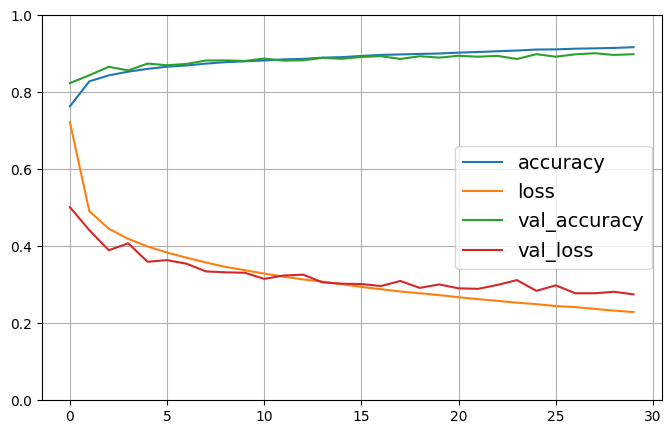

In [101]:
pd.DataFrame(historico.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [102]:
modelo.evaluate(X_teste, Y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8810 - loss: 0.3318


[0.32741495966911316, 0.8817999958992004]

## Fazendo predições com o modelo

In [103]:
X_novos = X_teste[:3]
Y_prob = modelo.predict(X_novos)
Y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [106]:
Y_pred = Y_prob.argmax(axis=-1)
Y_pred

array([9, 2, 1])

In [107]:
np.array(classes)[Y_pred]

array(['Bota', 'Suéter', 'Calças'], dtype='<U8')

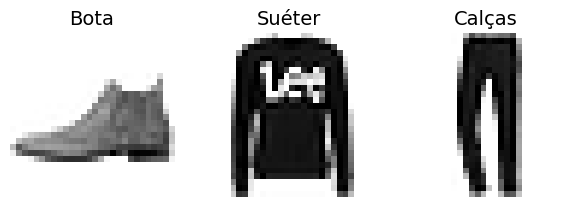

In [108]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_novos):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(classes[Y_teste[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()